# Grid World with SARSA
## Problem Setup
The grid is the same as before:

#### S  -  -  -
#### -  T  -  G
#### -  -  -  -

S: Start state.

G: Goal state (reward = +10).

T: Trap state (penalty = -10).

-: Empty cells (reward = -1 for each step).

## Importing Packages

In [26]:
import numpy as np 
import random
import matplotlib.pyplot as plt

## Defining the Environment

In [48]:
rows, cols = 3,4    # Grid dimensions
start_state = (0,0) # Starting position
goal_state = (1,1)  # Goal position
trap_state = (1,1)  # Trap position


## Define Rewards

In [28]:
rewards = np.full((rows,cols), -1) # Default step penalty
rewards[goal_state] = 10 # Goal reward
rewards[trap_state] = -10 # Trap penalty

## Possible Action

In [29]:
actions = ["up","down","left","right"]

## Map actions to coordinate

In [30]:
action_map = {
    "up":(-1,0),
    "down":(1,0),
    "left":(0,-1),
    "right":(0,1)
}

## Q-Table

In [31]:
Q = np.zeros((rows,cols,len(actions)))

### Hyperparameters

In [32]:
alpha = 0.1 # learning rate
gamma = 0.9 # Discount factor
epsilon = 0.2 # Exploration rate
episodes = 1000

### Helper Functions

In [33]:
def is_valid_state(state):
    """Check if the state is within bounds."""
    r, c = state
    return 0 <= r < rows and 0 <= c < cols

In [34]:
def choose_action(state):
    """Choose an action using epsilon-greedy policy."""
    if random.uniform(0,1) < epsilon:
        return random.randint(0,len(actions)-1) # Explore
    else:
        r, c = state
        return np.argmax(Q[r, c, :])  # Exploit

In [39]:
def get_next_state(state,action):
    """Get the next state based on the action."""
    r,c =state 
    dr, dc = action_map[action]
    next_state = (r + dr, c+dc)
    return next_state if is_valid_state(next_state) else state

# Sarsa Algorithm

In [50]:
for episode in range(episodes):
    state = start_state
    r, c = state
    action_index = choose_action(state)

    while state != goal_state:
        # Take action and observe the next state and reward
        action = actions[action_index]
        next_state = get_next_state(state, action)
        nr, nc = next_state
        reward = rewards[nr, nc]

        # Choose next action
        next_action_index = choose_action(next_state)

        # Update Q-value using SARSA formula
        Q[r, c, action_index] += alpha * (
            reward + gamma * Q[nr, nc, next_action_index] - Q[r, c, action_index]
        )

        # Move to the next state and action
        state = next_state
        r, c = nr, nc
        action_index = next_action_index

In [51]:
# Optimal policy visualization
policy = np.full((rows,cols)," ")
for r in range(rows):
    for c in range(cols):
        if (r,c) == goal_state:
            policy[r,c] = "G"
        elif (r,c)==trap_state:
            policy[r,c] = "T"
        
        else:
            best_action = np.argmax(Q[r,c,:])
            policy[r,c] = actions[best_action][0].upper()
            
print("Learned Policy")
print(policy)

Learned Policy
[['R' 'R' 'R' 'D']
 ['U' 'G' 'R' 'R']
 ['U' 'R' 'R' 'U']]


## Plot Q-values as heatmap

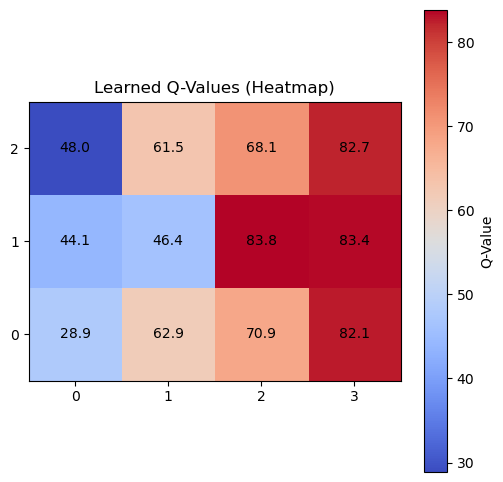

In [52]:
plt.figure(figsize=(6, 6))
plt.title("Learned Q-Values (Heatmap)")
for r in range(rows):
    for c in range(cols):
        plt.text(c, rows - r - 1, f"{np.max(Q[r, c, :]):.1f}", ha="center", va="center")

plt.imshow(np.max(Q, axis=2), cmap="coolwarm")
plt.colorbar(label="Q-Value")
plt.xticks(range(cols))
plt.yticks(range(rows))
plt.gca().invert_yaxis()
plt.show()